In [1]:
import re
delimiter = "，|。|、|？"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



In [2]:
w = '          周年慶    3歲         \n    大拍賣'
print w

          周年慶    3歲         
    大拍賣


In [3]:
print w.split()
for i in w.split():
    print i

['\xe5\x91\xa8\xe5\xb9\xb4\xe6\x85\xb6', '3\xe6\xad\xb2', '\xe5\xa4\xa7\xe6\x8b\x8d\xe8\xb3\xa3']
周年慶
3歲
大拍賣


In [4]:
print '|'.join(w.split())

周年慶|3歲|大拍賣


In [5]:
a = '民進黨後天將公布'
print a.split('後天')
for i in a.split('後天'):
    print i


['\xe6\xb0\x91\xe9\x80\xb2\xe9\xbb\xa8', '\xe5\xb0\x87\xe5\x85\xac\xe5\xb8\x83']
民進黨
將公布


In [6]:
print ''.join(a.split('後天'))

民進黨將公布


In [7]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key))
    return textAry


In [8]:
a = '民進黨後天將公布'
print removeKey(a, ['後天'])


a = '民進黨後天將公布'
print removeKey(a, ['民進黨', '後天'])


民進黨將公布
將公布


In [9]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)

In [10]:
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：|！".decode('utf-8')  

In [11]:
import sqlite3
db = sqlite3.connect('news2.sqlite') 
cur = db.cursor()
cur.execute('select title, summary from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[1]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

In [12]:
print len(sentenceAry)

40510


In [54]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [55]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word)            
            ret_terms.update({word:word_dic[word]})

In [56]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [57]:
for term in sorted_terms[0:30]:
    print term[0], term[1]

表示 96
台北報導 62
台灣 58
自己 56
沒有 55
提供 53
10 51
中國 50
報導 50
美國 48
目前 48
11 48
問題 47
朱立倫 47
可以 45
認為 44
英國 44
更新 44
蘋果 44
對於 44
發現 44
希望 43
今天 43
網友 43
指出 43
中心 42
可能 42
就是 41
民眾 40
不過 40


In [58]:
import jieba


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.578 seconds.
DEBUG:jieba:Loading model cost 0.578 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認


In [59]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [60]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag

大 a
巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯 nr
P eng
否認 v


In [61]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 


大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [62]:
jieba.add_word('柯P',100, 'nr')
jieba.add_word('大巨蛋',100, 'ns')


In [63]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 


大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [64]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]


大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [65]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


封口令
柯P


In [67]:
print sentenceAry[0]
words = jieba.cut(sentenceAry[0])
for ele in words:
    print ele

求婚失敗超尷尬
求婚
失敗
超
尷尬


In [13]:
import jieba
ret_terms = {}
for sentence in sentenceAry:
    words = jieba.cut(sentence)
    for ele in words:
        if ele not in ret_terms:
            ret_terms[ele] = 1
        else:
            ret_terms[ele] = ret_terms[ele] + 1


Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.572 seconds.
DEBUG:jieba:Loading model cost 0.572 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [14]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [15]:
for term in sorted_terms[0:200]:
    if len(term[0]) >=2:
        print term[0], term[1]

報導 899
表示 596
台灣 370
蘋果 355
台北 355
自己 355
中心 351
10 334
綜合 323
時間 319
可以 259
提供 256
更新 246
網友 237
今年 234
影片 227
新聞 223
因為 218
可能 213
就是 209
認為 209
指出 208
他們 206
今天 206
我們 205
警方 204
問題 200
發現 198
目前 198
公司 185
美國 184
不過 179
the 179
一個 179
中國 171
希望 164
日本 163
總統 159
11 158
不是 156
男子 154
工作 153
沒有 151
國民黨 149
美元 148
12 148
包括 147
要求 141
萬元 140
調查 140
未來 139
20 138
一名 138
政府 137
還是 136
因此 133
是否 132
朱立倫 131
進行 131
市場 130
已經 129
開始 129
其他 128
台北市 124
立委 122
照片 121
其中 120
女子 119
造成 117
所以 117
民眾 116
發生 115
經濟 115
英文 114
去年 114
什麼 114
增加 113
活動 113
英國 112
外電 112
使用 111
如果 111
相關 111


In [32]:
import jieba.analyse
ret_terms = {}
for sentence in sentenceAry:
    words = jieba.analyse.extract_tags(sentence)
    for ele in words:
        if ele not in ret_terms:
            ret_terms[ele] = 1
        else:
            ret_terms[ele] = ret_terms[ele] + 1


In [33]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [34]:
swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))



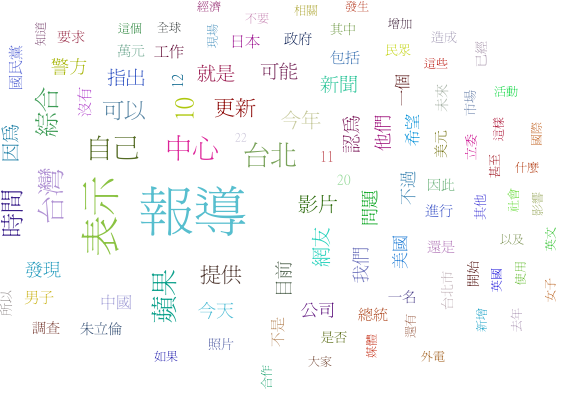

In [35]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [38]:
import requests
import json
res = requests.get('https://graph.facebook.com/v2.5/llchu/posts?access_token=CAACEdEose0cBAJEGzxIxq9aQffPcTtwH2ZC8YKLPJKwKzU2yxGmlZCBbIUwIOy72dplK0h2BHzN8FXiPacH3A2uG0HXWlkW4VbHptFHvJxoaSNFwGLZAvI4H7IL9HDqrZCtWIaZALA8SZALGcWCFyLTfrvbrFtejlTL0a0uvKSQVWnxS5PcvnAfUGIOuwpCZAVvmBex7XHc2AwXpfTw6gEj&debug=all&format=json&limit=100&method=get&pretty=0&suppress_http_code=1')
jd = json.loads(res.text)
messageary = []
for m in jd['data']:
    messageary.append(m['message'])

In [40]:
import jieba
ret_terms = {}
for message in messageary:
    words = jieba.cut(message)
    for w in words:
        if w not in ret_terms:
            ret_terms[w] = 1
        else:
            ret_terms[w] = ret_terms[w] + 1

In [41]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))

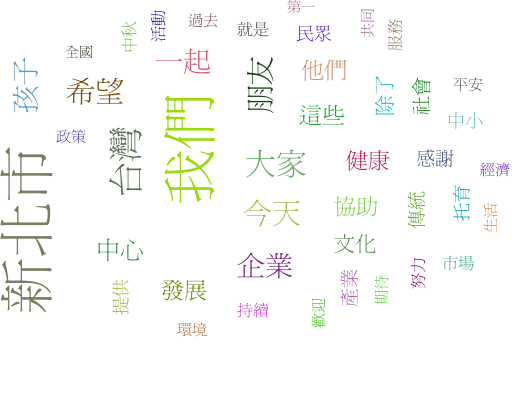

In [42]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [45]:
import jieba
import jieba.posseg as pseg
ret_terms = {}
for message in messageary:
    words = pseg.cut(message)
    for w in words:
        if w.flag in ['nr', 'n', 'ng', 'nr','nrfg','nrt','ns','nt','nz']:
            if w.word not in ret_terms:
                ret_terms[w.word] = 1
            else:
                ret_terms[w.word] = ret_terms[w.word] + 1

In [46]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))

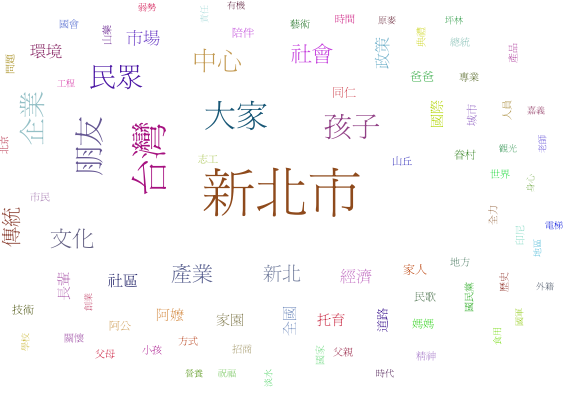

In [47]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [50]:
import requests
import json
res = requests.get('https://graph.facebook.com/v2.5/tsaiingwen/posts?access_token=CAACEdEose0cBAJEGzxIxq9aQffPcTtwH2ZC8YKLPJKwKzU2yxGmlZCBbIUwIOy72dplK0h2BHzN8FXiPacH3A2uG0HXWlkW4VbHptFHvJxoaSNFwGLZAvI4H7IL9HDqrZCtWIaZALA8SZALGcWCFyLTfrvbrFtejlTL0a0uvKSQVWnxS5PcvnAfUGIOuwpCZAVvmBex7XHc2AwXpfTw6gEj&debug=all&format=json&limit=100&method=get&pretty=0&suppress_http_code=1')
jd = json.loads(res.text)
messageary = []
for m in jd['data']:
    if 'message' in m:
        messageary.append(m['message'])

In [51]:
import jieba
import jieba.posseg as pseg
ret_terms = {}
for message in messageary:
    words = pseg.cut(message)
    for w in words:
        if w.flag in ['nr', 'n', 'ng', 'nr','nrfg','nrt','ns','nt','nz']:
            if w.word not in ret_terms:
                ret_terms[w.word] = 1
            else:
                ret_terms[w.word] = ret_terms[w.word] + 1

In [52]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))

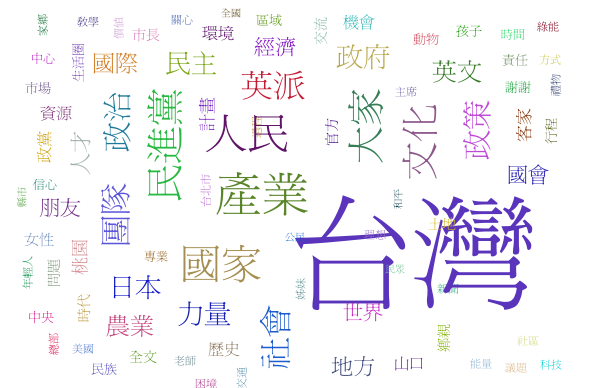

In [54]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [65]:
from IPython.display import display, HTML 

page= '''
  <head>
    <title>Word Cloud</title>
    <script src="tagcanvas.min.js" type="text/javascript"></script>
  </head>
  <body>
    <h1>Word Cloud</h1>
    <div id="myCanvasContainer">
      <canvas width="300" height="300" id="myCanvas">
        <p>Anything in here will be replaced on browsers that support the canvas element</p>
      </canvas>
    </div>
    <div id="tags"><ul id="weightTags">%s</ul></div>
  </body>
'''

js = '''
TagCanvas.Start('myCanvas','weightTags', {
 textFont: null,
 textColour: null,
 weight: true,
 shape: 'hring',
 weightMode: 'both',
 textFont: 'Impact,"Arial Black",sans-serif',
 /* more options */
 
});
$('#tags').css('display','None');
'''

import IPython
from IPython.core.display import display_html, display_javascript, Javascript

js_libs = ['tagcanvas.min.js']
li_str = ''
for li in swd:
    li_str += '<li><a href="http://www.google.com" data-weight="10" style="font-size: %dex">%s</a></li>'%(li[1]/10 , li[0])
    
display_html(IPython.core.display.HTML(data=page%(li_str)))
display_javascript( Javascript(data=js, lib= js_libs))

Word Cloud 
 
 
 
 Word Cloud 
 
 
 Anything in here will be replaced on browsers that support the canvas element 
 
 
 台灣 產業 人民 國家 民進黨 文化 大家 英派 團隊 社會 政治 政策 政府 力量 民主 日本 英文 農業 國際 地方 人才 朋友 經濟 國會 世界 桃園 計畫 客家 機會 政黨 歷史 環境 資源 女性 山口 交流 全文 問題 鄉親 土地 時代 市長 官方 責任 民族 孩子 區域 生活圈 市場 行程 謝謝 中央 動物 專業 中心 時間 信心 困境 過程 交通 方式 綠能 姊妹 科技 議題 年輕人 台北市 美國 家鄉 教學 總部 社區 禮物 價值 關心 新聞 主席 老師 能量 理想 公民 全國 縣市 和平 民眾

In [70]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf


a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

In [69]:
print a, abb, abc

['a'] ['a', 'b', 'b'] ['a', 'b', 'c']


In [72]:
s = [1,3,2,4,2,2,3,1,4,2]
print s.count(2)

4


In [87]:
#print a.count('a') 
#print sum(a.count('a') for w in set(a))
tf = a.count('a') / sum(a.count('a') for w in set(a))
print tf


1


In [89]:
import scipy as sp
print len(D)
print len([doc for doc in D if 'a' in doc])
print sp.log(10)
idf = sp.log(len(D) / len([doc for doc in D if 'a' in doc]))
print idf

tfidf = tf * idf
print tfidf

#idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
#sum(d.count(w) for w in set(d)


#print(tfidf("a", a, D))


3
3
2.30258509299
0.0
0.0


In [94]:

tf = float(abb.count('b')) / sum(abb.count(w) for w in set(abb))
print tf

idf = sp.log(float(len(D)) / (len([doc for doc in D if 'b' in doc])))
print idf
print sp.log(1.5)

print tf * idf 

0.666666666667
0.405465108108
0.405465108108
0.270310072072


In [96]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf

a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

print(tfidf("a", a, D))
print(tfidf("b", abb, D))
print(tfidf("a", abb, D))
print(tfidf("a", abc, D))
print(tfidf("b", abc, D))
print(tfidf("c", abc, D))


0.0
0.270310072072
0.0
0.0
0.135155036036
0.366204096223


In [97]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))


In [105]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for idx, title in enumerate(ary):
    corpus.append([])
    for ele in jieba.cut(title):
        corpus[idx].append(ele)


In [109]:
for ele in corpus:
    print '/ '.join(ele)

【/ 更新/ 】/ 柯/ P/ ：/ 洪智坤/ 洩漏/ 公文/ 案還/ 沒/ 看到/ 公文/ 　/ 今處理
留洪智坤/  / 柯/ ：/ 殘障/ 求職/ 不易
人事/ 處議/ 處/ 洪智坤/ 　/ 柯/ P/ ：/ 不/ 清楚/ 議處/ 結果


In [127]:
def tfidf(t, d, D):
    tf = float(d.count(t.decode('utf-8'))) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t.decode('utf-8') in doc])))
    return tf *idf 

In [129]:
print tfidf('公文', corpus[0], corpus)
print tfidf('洪智坤', corpus[0], corpus)

0.146481638489
0.0270310072072


In [130]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))


In [135]:
from sklearn.feature_extraction.text import CountVectorizer

ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']

vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 
for w in word:
    print w,
print 
print X.toarray()

不易 人事 今處理 公文 更新 案還 殘障 求職 洩漏 洪智坤 清楚 留洪智坤 看到 結果 處議 議處
[[0 0 1 2 1 1 0 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1]]


In [138]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
for w in word:
    print w,
print 
print weight

不易 人事 今處理 公文 更新 案還 殘障 求職 洩漏 洪智坤 清楚 留洪智坤 看到 結果 處議 議處
[[ 0.          0.          0.32311233  0.64622465  0.32311233  0.32311233
   0.          0.          0.32311233  0.24573525  0.          0.
   0.32311233  0.          0.          0.        ]
 [ 0.5         0.          0.          0.          0.          0.          0.5
   0.5         0.          0.          0.          0.5         0.          0.
   0.          0.        ]
 [ 0.          0.42339448  0.          0.          0.          0.          0.
   0.          0.          0.32200242  0.42339448  0.          0.
   0.42339448  0.42339448  0.42339448]]


In [141]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
jieba.add_word('洪智坤', 100, 'nr')
jieba.add_word('柯P', 100, 'nr')
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))


In [143]:
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 

In [144]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
for w in word:
    print w,
print 
print weight

不易 人事 今處理 公文 更新 柯p 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 處議 議處
[[ 0.          0.          0.31738473  0.63476946  0.31738473  0.24137927
   0.31738473  0.          0.          0.31738473  0.18745253  0.
   0.31738473  0.          0.          0.        ]
 [ 0.54645401  0.          0.          0.          0.          0.          0.
   0.54645401  0.54645401  0.          0.32274454  0.          0.          0.
   0.          0.        ]
 [ 0.          0.41074684  0.          0.          0.          0.31238356
   0.          0.          0.          0.          0.2425937   0.41074684
   0.          0.41074684  0.41074684  0.41074684]]


In [145]:
from sklearn.metrics.pairwise import linear_kernel


In [149]:
print tfidf[2]

  (0, 13)	0.410746835009
  (0, 15)	0.410746835009
  (0, 11)	0.410746835009
  (0, 14)	0.410746835009
  (0, 1)	0.410746835009
  (0, 10)	0.242593697538
  (0, 5)	0.31238355521


In [152]:
print linear_kernel(tfidf[0], tfidf)
print  linear_kernel(tfidf[0], tfidf).flatten()

[[ 1.          0.06049928  0.12087772]]
[ 1.          0.06049928  0.12087772]


In [151]:
print linear_kernel(tfidf, tfidf)

[[ 1.          0.06049928  0.12087772]
 [ 0.06049928  1.          0.07829579]
 [ 0.12087772  0.07829579  1.        ]]


In [160]:
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
print cosine_similarities

[ 1.          0.06049928  0.12087772]


In [161]:
related_docs_indices = cosine_similarities.argsort()[:-3:-1]
related_docs_indices
for index in related_docs_indices:
    print ary[index]


【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理
人事處議處洪智坤　柯P：不清楚議處結果


In [159]:
print X.toarray()
cosine_similarities2 = linear_kernel(X, X)
print cosine_similarities2

[[0 0 1 2 1 1 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1]]
[[ 11.   1.   2.]
 [  1.   4.   1.]
 [  2.   1.   7.]]


In [185]:
import sqlite3
db = sqlite3.connect('news2.sqlite') 
cur = db.cursor()
cur.execute('select title, summary from news_entry')
allNews = cur.fetchall()
corpus = []
ary = []
for rec in allNews:
    ary.append(rec[0])
    corpus.append(' '.join(jieba.analyse.extract_tags(rec[1], 20)))
cur.close()

In [186]:
print corpus[0]
print corpus[1]

求婚 男子 快艇 醫院 女子 戒指 一名 失敗 護士 中國 報導 走上 超霸 據悉 期間 離場 一間 丟下 周圍 遊艇
新北 新北市 時間 問題 鉛管 新店 三重 更新 李倩萍 資資料 數近 曾佳俊 雙北共飲 不滿 256 區域 14 萬戶 一河 議員


In [187]:
print len(corpus)

901


In [188]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 

In [189]:
print len(word)

9002


In [190]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 

In [191]:
print weight[1]
print weight.shape

[ 0.  0.  0. ...,  0.  0.  0.]
(901, 9002)


In [192]:
cosine_similarities = linear_kernel(tfidf[1], tfidf).flatten()
print cosine_similarities

[ 0.          1.          0.01977476  0.          0.17260879  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.03270045  0.          0.01322105  0.          0.          0.01384389
  0.03387644  0.06037945  0.0313772   0.          0.          0.          0.0320357
  0.          0.01435895  0.19691579  0.          0.          0.01674637
  0.          0.          0.          0.          0.          0.          0.
  0.          0.02331812  0.          0.          0.          0.02309224
  0.          0.          0.          0.          0.          0.
  0.01390908  0.          0.03147146  0.          0.01496762  0.
  0.03202909  0.02568445  0.02364981  0.          0.          0.01724678
  0.          0.          0.          0.          0.          0.          0.
  0.          0.03268865  0.          0.02366176  0.          0.
  0.03064867  0.          0.          0.03891524  0.          0.01387761
  0.01347323  0.0447324   0.          0.        

In [194]:
print ary[1]

獨家！新北256路段鉛管曝光　來看你家有...


In [198]:
related_docs_indices = cosine_similarities.argsort()[:-9001:-1]
related_docs_indices
for index in related_docs_indices:
    print ary[index], index, cosine_similarities[index]

獨家！新北256路段鉛管曝光　來看你家有... 1 1.0
鉛管風暴來龍去脈　《蘋果》懶人包秒懂 29 0.196915792017
消除北水處鉛管恐慌　新北要求三年內汰換 4 0.172608792493
【更新】修內規替王金平解套　朱立倫：絕非... 124 0.10509671951
處理世大運選手村　柯P：明年5月與中央討... 195 0.101538817723
【更新】北市優先汰換密集鉛管區　明起可上... 660 0.0977797305799
【更新】嘉義市立委選舉　王金平勸進黃敏惠 196 0.0835864791456
【更新】浮洲合宜宅受災戶：「如影隨形」跟... 787 0.0815208955617
【更新】北市明年水費漲不漲？柯P：要漲才... 816 0.0802772953244
新北也有鉛水管　雙和、新店、三重約1萬多... 500 0.0732882757393
【建案搶先看】新莊頭前重劃區　超好住啦 151 0.0708128806302
【更新】警蒐集總統參選人樁腳等個資　分局... 406 0.0706062438237
鉛水問題引恐慌　柯P公布鉛水管懶人包 208 0.0676380964046
【民報黃慧芬專欄】更換自來水鉛管真有那麼... 620 0.0667926825933
「市民有知的權利」　柯P鉛管懶人包大解析 100 0.0663293439399
【更新】全運地主高雄女排苦戰五局險勝新北... 514 0.0648609614898
司法辦藍不辦綠？　蔡英文：現在是國民黨在... 689 0.0642255466459
新北公務員收八仙門票涉貪瀆　檢方今分案追... 684 0.0638172258964
糗了！載到周公　男自撞翻車困 264 0.0630287895786
【更新】局長收賄護八仙？　爆料錄音曝光 567 0.0627498469187
雨下不停　3縣市發布豪雨大雨特報 613 0.0624746965831
【更新】刪退休公僕三節慰問金？　柯：今年... 864 0.0621649910871
中橫撞車翻覆　母帶4童爬出求救 21 0.060379452102
​烤麵包沒抽風　2員工一氧化碳中毒 887 0.0603737325983
小22歲少妻手機狂響　妒夫竟揮神像砸死她 741 0

In [197]:
print corpus[124]
print corpus[1]

國會 朱立倫 議長 王金平 國民黨 問題 制度 立委 屆數 議員 時間 不會 考紀 現在 因人 限制 改革 主持人 杯葛 更新
新北 新北市 時間 問題 鉛管 新店 三重 更新 李倩萍 資資料 數近 曾佳俊 雙北共飲 不滿 256 區域 14 萬戶 一河 議員


In [199]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [204]:
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
print n_cosine_similarities

[[ 1.          0.          0.04200721  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.          0.01977476  0.          0.17260879  0.          0.
   0.          0.          0.        ]
 [ 0.04200721  0.01977476  1.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.17260879  0.          0.          1.          0.01622141
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.01622141  1.
   0.03085396  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.03085396
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.        ]
 [ 0.          0.          0.          0.       

C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


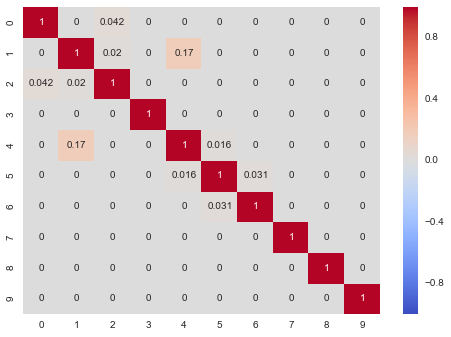

In [205]:
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')

In [210]:
print ary[1]
print ary[4]

獨家！新北256路段鉛管曝光　來看你家有...
消除北水處鉛管恐慌　新北要求三年內汰換


In [208]:
n_cosine_similarities = linear_kernel(tfidf[0:20], tfidf[0:20])
print n_cosine_similarities

[[ 1.          0.          0.04200721  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.01977476  0.          0.17260879  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.03270045  0.          0.01322105  0.          0.          0.01384389]
 [ 0.04200721  0.01977476  1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.0194203   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.17260879  0.          0.          1.          0.01622141
  

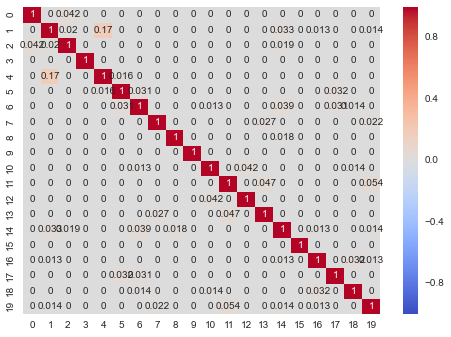

In [209]:
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')

In [212]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)

In [215]:
a = [1,2,3,4,1,2,3,1]
cnt = 0 
for ele in a:
    if ele == 4:
        print ele, cnt
    cnt +=1

4 3


In [217]:
for idx, ele in enumerate(a):
    if ele == 4:
        print ele, idx

4 3


In [222]:
for idx, grp in enumerate(k_data):
    if grp == 3:
        print ary[idx]

消除北水處鉛管恐慌　新北要求三年內汰換
烏龍交易到世界大賽　佛羅瑞斯心懷感謝
瞎！「肉骨獸」是食品　噗浪須做食品業登錄
綠委籲公布全台性侵熱點　陳威仁：此類犯罪...
日正妹女星上節目遭公然襲胸　金鋼狼傻眼
朱立倫選情大好 竟是….
【更新】強調不打房　柯：若營建業垮掉　台...
搶攻客家票　英倫新竹首度拼場　 
蔡英文新竹拔樁　水利會長祝高票當選
【社企流】想要有與眾不同的求婚嗎？買只「...
柱姐募款不足　葉匡時：曾向黨部借支三千萬...
「不要亂咬人」　呂忠吉嗆消防局長錄音曝光
陸官校友授「挺倫」戰旗　朱立倫再向柱姐致...
【民報】罕病勇士仁佑──用打字板呼喚世界...
超浪漫！　這支廣告感動近千萬網友
Gigi升格俏人妻　放閃新婚「挺不賴的」
【環資報導】修樹就讓專業的來！ 台灣第一...
酒駕累犯不三振  中檢太「善良」
【更新】政務官輔選適當否？柯P：不知　要...
【環資報導】從利維坦到莉維達：捕魚船上的...
異哉！敬老金竟成了不是問題的問題
色老頭戴屌環　公車對女大生獻寶
大象寶寶是小象　但圓仔不是小貓熊
有影無？緣投就有票！ 
【建案搶先看】11月　皮包掏出來繳地價稅...
朱立倫訪美　林永樂：不介入行程規劃
前RCA工人抗議　爭全面職災給付
【建案搶先看】新莊頭前重劃區　超好住啦
【央廣RTI】 北韓欲締和平 美：除非放...
【更新】向友人哭訴「大勢已去」?　柱姐怒...
另一半想當家庭主夫？　女鄉民熱議
八仙塵爆家屬再爆不合　發言人遭踢出群組
4年要蓋2萬戶公宅　柯Ｐ：我也不敢大聲講
世界最大的「陸地造船」　就在高雄
議員問英倫總統大戰挺誰　柯P未表態
萬華青年宅流標4次　林洲民：今開標樂觀
【壹週刊】Dior and I 美麗的邂...
英倫只差50萬票？　蔡英文：持續看公道伯...
余祥銓緋聞女死會　透露想婚頭
處理世大運選手村　柯P：明年5月與中央討...
民政局長出席小英活動　柯團隊挨批行政不中...
人夫道歉的LINE　最後一句100%真心
​酒駕三振只易科罰金？　內政部憂心酒駕恐...
歐登：不再碰毒　與科勒卡達夏重修舊好
【痞客邦】召喚靈魂曾有過的純粹部分：《小...
這10個暗黑秘密　大家都不敢跟愛人說
Q版漫畫羽絨衣　MONCLER東京獨賣
KTV點哪首歌最令人惱火？　這首紅遍兩岸...
看看背後　別讓孩子學你做一樣的事

In [223]:
print c.inertia_

887.859686479


In [230]:
from sklearn import cluster
wcss = []
for i in range(2,20):
    c = cluster.KMeans(n_clusters=i)
    k_data = c.fit_predict(weight)
    wcss.append((i, c.inertia_))
    print c.inertia_

891.791398706
890.61957243
887.44975318
886.516549005
883.929011001
883.14658205
881.904140648
880.592903837
879.893006387
877.765484731
875.486039904
873.543302731
872.625555459
871.575209905
868.955271241
869.803838757
866.693596437
865.910411455


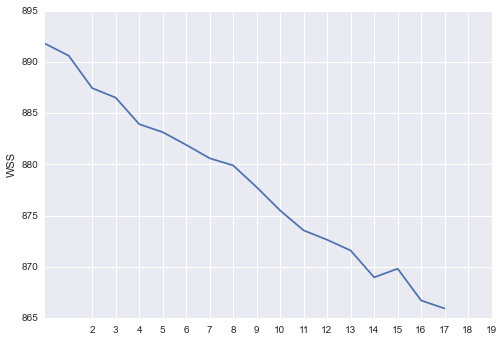

In [231]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in wcss ]
plt.plot(plotary)
plt.ylabel('WSS')
plt.xticks(range(2,20))
plt.show()

In [232]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=8)
k_data = c.fit_predict(weight)

In [241]:
for idx, grp in enumerate(k_data):
    if grp == 7:
        print ary[idx]

獨家！新北256路段鉛管曝光　來看你家有...
鉛管風暴來龍去脈　《蘋果》懶人包秒懂
朱立倫選情大好 竟是….
選副總統？賴清德：不回答假設問題
朱立倫帶職參選　毛揆：民選公職依法請假所...
搶攻客家票　英倫新竹首度拼場　 
蔡英文新竹拔樁　水利會長祝高票當選
柱姐募款不足　葉匡時：曾向黨部借支三千萬...
比卡麥隆有種　倫敦男拿「人權」K爆習粉
陸官校友授「挺倫」戰旗　朱立倫再向柱姐致...
不能在一起　至少最後好好分手
【更新】糗！反賄選旗桿竟斷頭　羅瑩雪臉都...
臉書讓iPhone大耗電　急推新版APP
陳德容冒冷汗當菜鳥　生孩子再說啦
【更新】政務官輔選適當否？柯P：不知　要...
「市民有知的權利」　柯P鉛管懶人包大解析
英女皇國宴上那瓶1989年份紅酒的弦外之...
【更新】修內規替王金平解套　朱立倫：絕非...
有影無？緣投就有票！ 
朱立倫訪美　林永樂：不介入行程規劃
80公斤是壁花　她減到54公斤變校花
【央廣RTI】 北韓欲締和平 美：除非放...
【更新】向友人哭訴「大勢已去」?　柱姐怒...
4年要蓋2萬戶公宅　柯Ｐ：我也不敢大聲講
世界最大的「陸地造船」　就在高雄
議員問英倫總統大戰挺誰　柯P未表態
【壹週刊】Dior and I 美麗的邂...
英倫只差50萬票？　蔡英文：持續看公道伯...
處理世大運選手村　柯P：明年5月與中央討...
【更新】嘉義市立委選舉　王金平勸進黃敏惠
鉛水問題引恐慌　柯P公布鉛水管懶人包
民政局長出席小英活動　柯團隊挨批行政不中...
【特企】蘋果賞屋祭  全省動員看房去
KTV點哪首歌最令人惱火？　這首紅遍兩岸...
捷運站前這一幕　忍不住讓人「認同分享」
以巴仇恨何時了 　女童：搶我土地用刀捅你
命理師看祖厝陽宅　「朱立倫再旺20年」
「總統肖像刺在我雞上」　青年作家遭追緝
朱立倫只差50萬票　王金平：有望勝選
蔡英文最重視的立委參選人　原來是他
惡狼一個月姦3女　還當孫子面前硬上豔嬤
蔡英文北市拔樁　國民黨里長近百人出席
十月二十三日世界各報頭條搶先報
十月二十三日各報頭條搶先報
加劇分裂？　「英格蘭法案由英格蘭議員表決...
孕婦買安胎藥　藥局錯給避孕藥致小產 
2015機器人世界展　28日南韓開展
維持現狀不能單靠北京善意
趙少康：朱立倫速提路線圖
普悠瑪號為何變成誤點王
呂秋遠：憑什麼要求醫生

In [324]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1435449602.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()
corpus = []
ary= []
for elem in events.findall('./channel/item'):
    title = elem.find('title').text
    description = elem.find('description').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))

In [325]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 

In [326]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)

In [340]:
for idx, grp in enumerate(k_data):
    if grp == 2:
        print ary[idx]

希臘國內三分一自動櫃員機現金短缺
台鐵新基隆車站29日正式啟用
基改不算真食物  法國人知情就不買
《農民曆小幫手》國曆六月二十八日
大台北今高溫上探37度
歐元區財長拒希臘延長救助計劃
風評：陷入獵巫遊戲的中資認定
挪威「行動大雕」出沒 隨機射路人
還是熱！西半部高溫達37度
德國即將關閉使用最久核子反應爐
八仙樂園爆炸案 專家認玉米粉危險性高應管制使用
2015空姐夏裝大盤點
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
觀點投書：讀中文系的人，應該反對課綱微調
觀點投書：何謂新兵訓練
呂政璋觀點：點土成金新思維~以台灣柳丁為例
觀點投書：招搖的進步
中俄美競造5音速機彈
手相看什麼樣的女人性格強勢
面相看哪些人財運綿長不盡
【美洲盃八強】巴西 VS. 巴拉圭 線上直播！
塔羅占卜你今生最看重的是什麼
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
塔羅占卜你是個有心機的人嗎？
挑選新鮮食物 大有學問
調心養心 初夏多吃蔬果
夏天吃什麼好 紅棗、苦瓜攏總來
補鈣能手大比拚 牛奶吸收效果好
暑假應考季 小心體內酸鹼失衡
水果中的皇后 草莓多食好處多
古人愛西瓜 清明上河圖可佐證
旺報觀點－紀念抗戰 台日中獲和解轉機
陸官淪陪酒郎 2年10起醉死案
慈禧愛西瓜盅 一天可吃數十個
紀念抗戰 學者：反省、避免戰爭
多位台老兵 受邀赴陸閱兵
陸改革遇5瓶頸 難以落實基層
金蟬花替代蟲草 浙民服用中毒
鄭弘儀反紀念抗戰 陸批數典忘祖
《經濟教室》白居易、蘇東坡看加薪
大陸》A股紅火 中資想回家
大陸》華人赴美置產不手軟
北美》線上貸款業搶飯碗
北美》加州光熱發電受挫
歐洲》高貴的徵才條件
東北亞》大眾運輸費變貴了
歐洲》荷蘭的稻田發電
有話要說－別害警察不敢用槍
中間選民為洪秀柱按讚
學生心態M化 台大有責任
莫忘來時路／6月28日－先上車後補票成歷史
短評－柯P 去上海吧
花蓮民宅火警 1男嗆昏送醫
屏東樂遊東港 住民宿探蚵殼島
競選總部入厝　洪慈庸期許台中煥然一新
超商父親節早鳥預購開跑　聶永真設計商品再次收藏
八里爆炸意外衛生局凌晨公布314名傷患名單 分送27
確保銀行穩定 希臘續與ECB緊密合作
「我不說誰說？」世新廣電畢製《東所》受難者觀影
希臘態度強硬 歐元區耐心漸失
單親媽媽第一次下海就被逮　直呼太倒楣了！
提升財運的家居風水
希臘盼展延債

In [333]:
from sklearn import cluster
idx2 = cluster.SpectralClustering(n_clusters=4).fit_predict(weight)

In [334]:
print idx2

[0 0 1 1 0 1 0 1 1 1 1 0 1 3 3 1 0 1 1 1 3 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 3 3
 3 0 0 1 1 2 0 1 3 0 3 1 0 3 3 3 0 3 1 1 1 1 1 1 1 1 2 1 1 1 1 3 0 0 3 3]


In [339]:
for idx, ele in enumerate(idx2):
    if ele == 3:
        print ary[idx]

羅志祥哭了 蔡依林讚表現很好
蔡依林淚奪金曲 錦榮傳訊恭喜
陳奕迅、張惠妹稱王封后  蔡依林抱回最大獎
陳奕迅、莫文蔚伴侶均不知阿娜答金曲獲獎
金曲26／陳奕迅二度擊敗張學友　濕身奪歌王
金曲26／蔡依林擒３獎大勝　淚崩再挺婚姻平權
金曲26／張惠妹奪歌后卻失落　要世界感受彩虹力量
僅次Jolin！徐佳瑩入圍6獎全槓被封遺珠
金曲最風光！蔡依林紅毯全勝又獲3獎成大贏家
張惠妹3度封后  想破江蕙紀錄
金曲26／陳奕迅稱王謝台灣　張惠妹封后秒噴淚
蔡依林呸大贏家  金曲最佳專輯獎
陳奕迅二度打敗歌神  金曲歌王好嗨
第26屆金曲獎 陳奕迅奪歌王、阿妹封歌后
金曲最佳國語專輯：呸
《金曲26》2015金曲獎得獎名單 線上直播懶人包


In [342]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)

In [343]:
n_cosine_similarities = linear_kernel(tfidf, tfidf)

In [344]:
print tfidf.shape

(147, 1881)


In [355]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [356]:
pca_data = pca.fit_transform(n_cosine_similarities)
print pca_data.shape

(147, 2)


In [357]:
print pca_data

[[ -4.82892054e-01  -1.20848312e-01]
 [ -3.31142404e-01  -1.19192847e-01]
 [  1.34610908e-01   1.86601595e-01]
 [  1.02922389e-01   1.42994038e-01]
 [ -5.06425207e-01  -9.92628015e-02]
 [  1.26330216e-01   1.61720131e-01]
 [ -3.89858868e-01  -7.33056414e-02]
 [  8.14725884e-02   1.00776437e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.68517584e-01  -3.88867681e-02]
 [  1.03240992e-01   1.66763598e-01]
 [ -4.88734424e-01  -1.01991800e-01]
 [  1.70736604e-01   2.55362674e-01]
 [  2.08037230e-01  -3.13014231e-01]
 [  4.34740660e-01  -7.16871002e-01]
 [  1.49657977e-01   1.62001716e-01]
 [ -5.81561390e-01  -1.58725031e-01]
 [  1.04598017e-01   1.47557706e-01]
 [  1.07013227e-01   1.46104427e-01]
 [  1.14682794e-01   1.36403297e-01]
 [  4.46854478e-01  -7.19960993e-01]
 [ -1.77496879e-01   4.12482065e-02]
 [  1.17953887e-01   1.07804844e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.17749129e-01   2.26429938e-01]
 [ -5.86662563e-01  -1.55249189e-01]
 [  1.31038638e-01   1.56424403e-01]
 

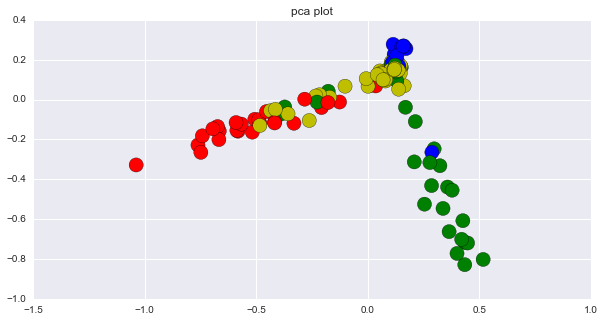

In [359]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbyc'[i] for i in k_data ], s=200)
axes.set_title('pca plot')

In [378]:
corpus_dic = {}
for idx, grp in enumerate(k_data):
    if grp == 3:
        for w in corpus[idx].split():
            if w not in corpus_dic:
                corpus_dic[w] = 1
            else: 
                corpus_dic[w] = corpus_dic[w] + 1

In [379]:
import operator
sorted_terms = sorted(corpus_dic.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [380]:
for ele in sorted_terms[0:20]:
    print ele[0], ele[1]

27 10
現場 7
樂園 7
div 6
爆炸案 6
美國 5
28 5
10 5
大陸 5
醫院 4
他們 4
還有 4
出現 4
國家 4
抗戰 4
進行 4
粉塵 4
台灣 4
閃燃 3
ad 3
